In [6]:
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn
from IPython.display import HTML
from tqdm import tqdm
from IPython.core.debugger import Pdb
import scipy.io as sio
from tqdm import trange, tqdm_notebook
pdb = Pdb()
# pdb.set_trace()
#import plotly.plotly as pl
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
figWidth = 11
figHeight = 8

In [7]:
# A simple function to display an image in an ipython notebook
def nbimage( data ):
    from IPython.display import display, Image
    from PIL.Image import fromarray
    from StringIO import StringIO
 
    s = StringIO()
    fromarray( data ).save( s, 'png' )
    display( Image( s.getvalue() ) )

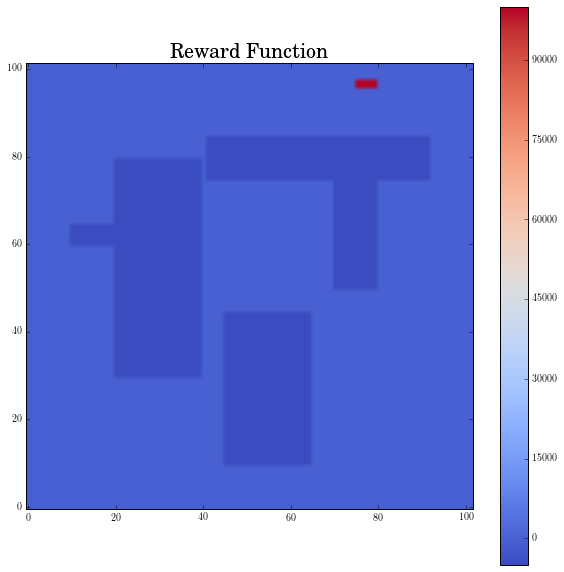

In [135]:
# Create a map for MDP path planning homework

N = 100
Np = 100 + 2

reward = 100000.
punishment = -5000.
wall = -100.
general = -2.


# Initialize walls and obstacle maps as empty
walls = np.zeros((Np,Np))
obs1 = np.zeros_like(walls)
obs2 = np.zeros_like(walls)
obs3 = np.zeros_like(walls)
goal = np.zeros_like(walls)

# Create exterior walls
walls[1,1:N] = 1
walls[1:N+1,1] = 1
walls[N+1,1:N+1] = 1
walls[1:N+1,N+1] = 1

# Create single obstacle
obs1[20:40,30:80] = 1
obs1[10:20,60:65] = 1

# Another obstacle
obs2[45:65,10:45] = 1

# Another obstacle
# obs3[43:92,75:85] = 1
obs3[41:92,75:85] = 1
obs3[70:80,50:75] = 1

# The goal states
goal[75:80,96:98] = 1

# Put walls and obstacles into map
M = walls + obs1 + obs2 + obs3 + goal

# define the immediate reward function
R = wall*walls + punishment*(obs1 + obs2 + obs3) + reward*goal + general

# initialize the value function
V = np.copy(R)

# # Plot map
# # Sort through the cells to determine the x-y locations of occupied cells
# [Mm,Nm] = size(map)
# xm = [];
# ym = [];
#     for i = 1:Mm
#         for j = 1:Nm
#             if map(i,j)
#                 xm = [xm i];
#                 ym = [ym j];
#             end
#         end
#     end

# figure(1); clf;
# plot(xm,ym,'.');
# axis([0 Np+1 0 Np+1]);
# axis('square'); 
env = plt.figure(figsize=(10, 10))
ax = env.add_subplot(1, 1, 1)
m_handle = plt.imshow(V.T, cmap="coolwarm", origin="lower")

# m_handle.norm.vmin = 0.0
# m_handle.norm.vmax = 1.0
ax.set_title("Reward Function",fontsize=20)
plt.colorbar(m_handle)
plt.show()

In [136]:
#discount factor
gamma = 0.99

# the control input, u, can be {0, 1, 2, 3}
# corresponding to moving {North, East, South, West} respectively
pbar = tqdm_notebook()
for k in xrange(1000):
    for i in xrange(1, N+1):
        for j in xrange(1, N+1):
            v = np.zeros(4)
            v[0] = 0.8*V[i+1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1]
            v[1] = 0.8*V[i, j+1] + 0.1*V[i-1, j] + 0.1*V[i+1, j]
            v[2] = 0.8*V[i-1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1]
            v[3] = 0.8*V[i, j-1] + 0.1*V[i-1, j] + 0.1*V[i+1, j]
#             v[0] = 0.75*V[i+1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1] + 0.05*V[i-1, j]
#             v[1] = 0.75*V[i, j+1] + 0.1*V[i-1, j] + 0.1*V[i+1, j] + 0.05*V[i, j-1]
#             v[2] = 0.75*V[i-1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1] + 0.05*V[i+1, j]
#             v[3] = 0.75*V[i, j-1] + 0.1*V[i-1, j] + 0.1*V[i+1, j] + 0.05*V[i, j+1]
            
            V[i, j] = gamma*(R[i, j] + np.max(v))
            if M[i, j]:
                V[i, j] = R[i, j]
    pbar.update(1)

# now define the optimal policy
A = np.zeros_like(V)
B = np.zeros_like(V)
for i in xrange(1, N+1):
    for j in xrange(1, N+1):
        v = np.zeros(4)
        v[0] = 0.8*V[i+1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1]
        v[1] = 0.8*V[i, j+1] + 0.1*V[i-1, j] + 0.1*V[i+1, j]
        v[2] = 0.8*V[i-1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1]
        v[3] = 0.8*V[i, j-1] + 0.1*V[i-1, j] + 0.1*V[i+1, j]
#         v[0] = 0.75*V[i+1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1] + 0.05*V[i-1, j]
#         v[1] = 0.75*V[i, j+1] + 0.1*V[i-1, j] + 0.1*V[i+1, j] + 0.05*V[i, j-1]
#         v[2] = 0.75*V[i-1, j] + 0.1*V[i, j-1] + 0.1*V[i, j+1] + 0.05*V[i+1, j]
#         v[3] = 0.75*V[i, j-1] + 0.1*V[i-1, j] + 0.1*V[i+1, j] + 0.05*V[i, j+1]

        p = np.argmax(v)
        if p == 0:
            A[i, j] = 1.
            B[i, j] = 0.
        if p == 1:
            A[i, j] = 0.
            B[i, j] = 1.
        if p == 2:
            A[i, j] = -1.
            B[i, j] = 0.
        if p == 3:
            A[i, j] = 0.
            B[i, j] = -1.


            

A Jupyter Widget

In [137]:
# set the initial conditions
x = np.array([[28, 20]]).T
print(x)
print(M[x[0, -1], x[1, -1]])
term = M[x[0, -1], x[1, -1]]
# run until we reach a terminal state
while not term:
    delta = np.array([A[x[0, -1], x[1, -1]], B[x[0, -1], x[1, -1]]], dtype=np.int).T
#     print(delta)
    x = np.hstack((x, (x[:, -1] + delta)[:, None]))
    term = M[x[0, -1], x[1, -1]]
#     print(x)

print(x.shape)

[[28]
 [20]]
0.0
(2, 156)


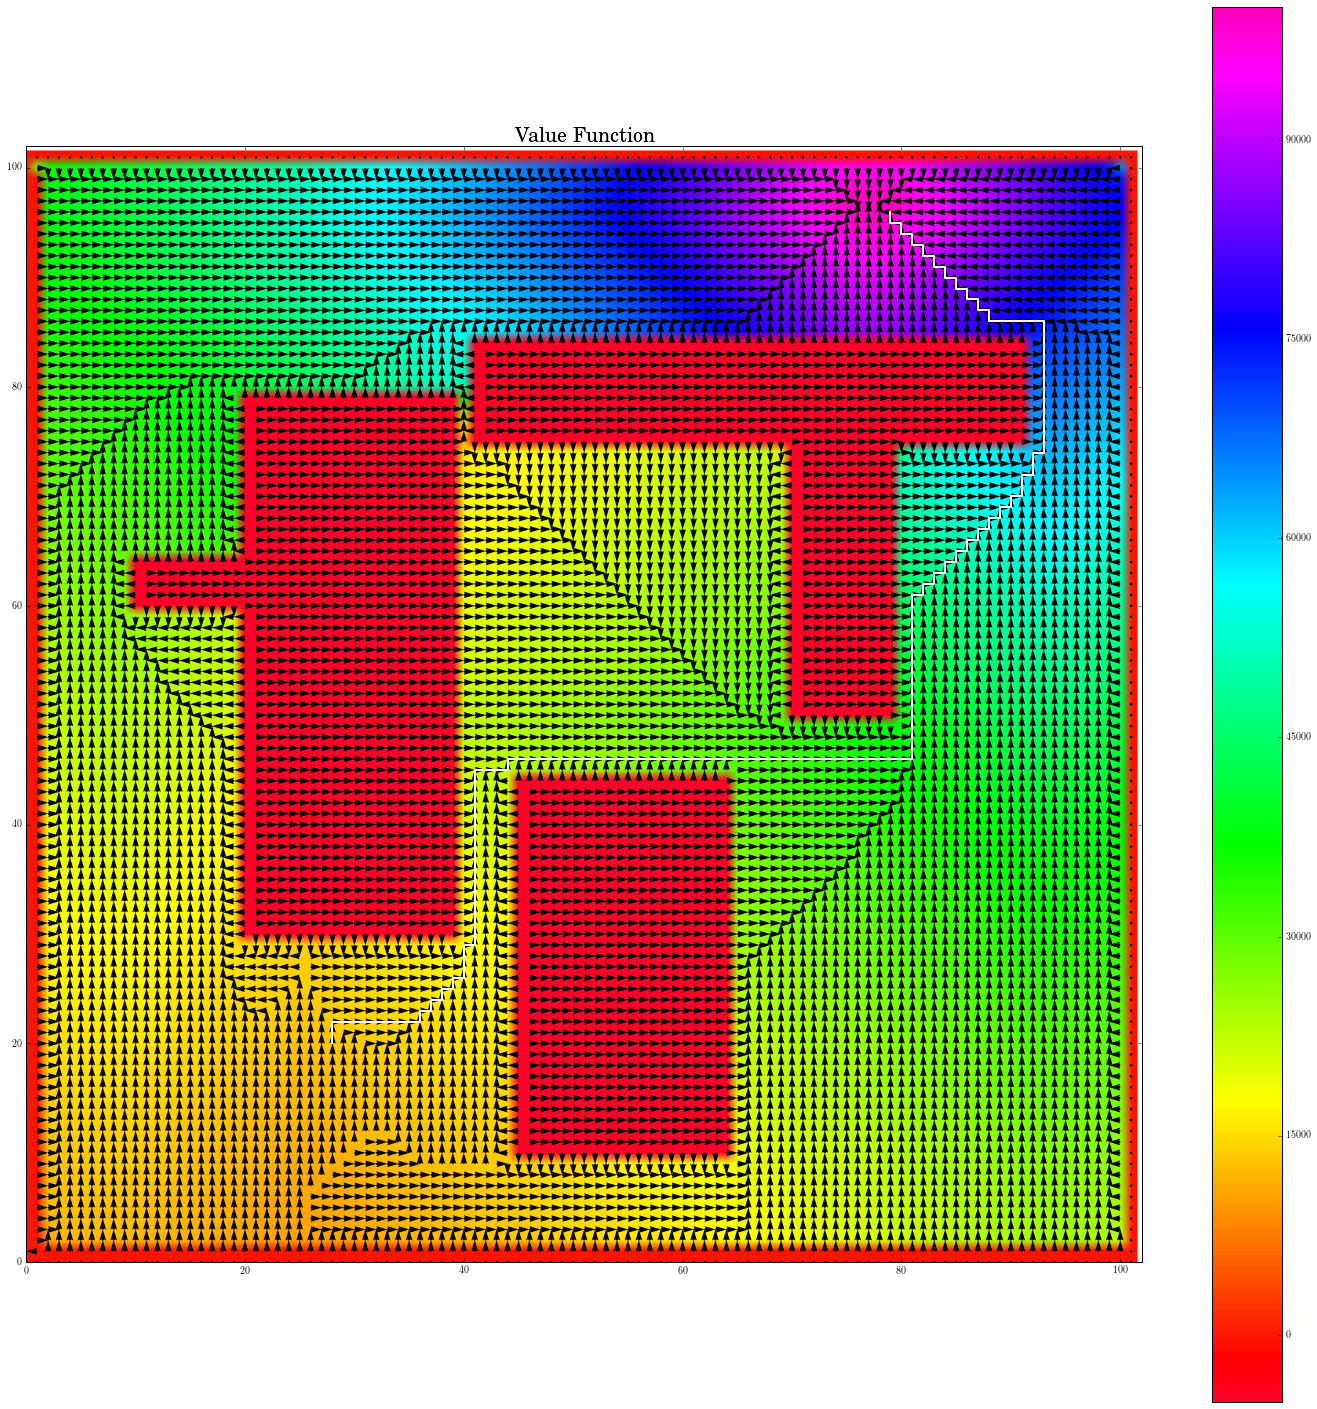

1000it [01:19, 15.48it/s]

In [138]:
X, Y = np.meshgrid(np.arange(Np), np.arange(Np))
        
env = plt.figure(figsize=(25, 25))
ax = env.add_subplot(1, 1, 1)
ax.set_xlim([0, Np])
ax.set_ylim([0, Np])
m_handle = plt.imshow(V.T, cmap="gist_rainbow", origin="lower")

s = 1
plt.quiver(X[::s, ::s], Y[::s, ::s], A[::s, ::s].T, B[::s, ::s].T, scale=100.)
plt.plot(x[0, :], x[1, :], color='white', linewidth=2)

# m_handle.norm.vmin = 0.0
# m_handle.norm.vmax = 1.0
ax.set_title("Value Function",fontsize=20)
plt.colorbar(m_handle)
plt.show()